In [9]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [10]:
# Read in the california housing data set
housing_df = pd.read_csv('../Resources/California_Housing.csv')
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     5.2742      17.0  8.908654   1.884615       351.0  1.687500     32.98   
1     1.8438      52.0  3.069847   1.044293      2382.0  4.057922     34.07   
2     7.0691      13.0  6.689697   1.009697      2444.0  2.962424     37.57   
3     5.4719      38.0  5.890080   0.957105      1228.0  3.292225     37.52   
4     4.0156      35.0  6.195312   1.171875       669.0  5.226562     33.93   
...      ...       ...       ...        ...         ...       ...       ...   
2995  4.5724       4.0  6.837037   1.229630       352.0  2.607407     35.10   
2996  3.6031      52.0  3.702592   1.062756      1438.0  1.961801     37.77   
2997  5.2820      24.0  5.918495   1.000000       950.0  2.978056     32.85   
2998  1.3668      52.0  2.673635   1.089431      1515.0  1.759582     37.79   
2999  4.9688      15.0  6.185950   1.004132       730.0  3.016529     38.68   

      Longitude  
0       -117.27  
1       -118.26  
2       -121.87  
3       -122.28  
4       -117.41  
...         ...  
2995    -117.98  
2996    -122.43  
2997    -117.00  
2998    -122.41  
2999    -121.25  

[3000 rows x 8 columns]

In [12]:
# Determine which measure of central tendency is most appropriate to describe the Population
population_df = housing_df['Population']
mean_population = np.mean(population_df)
print(f'Mean population is {mean_population}')
median_population = np.median(population_df)
print(f'Median population is {median_population}')
mode_population = sts.mode(population_df)
print(f'Mode population is {mode_population}')

Mean population is 1387.9633333333334
Median population is 1152.5
Mode population is ModeResult(mode=array([1128.]), count=array([8]))


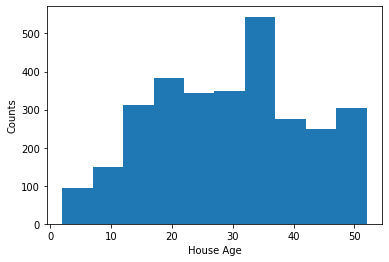

NormaltestResult(statistic=2.6153588739811298, pvalue=0.27044691788123254)


In [16]:
# Determine if the house age in California is considered normally distributed
age_df = housing_df['HouseAge']
plt.hist(age_df)
plt.xlabel('House Age')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(age_df.sample(50)))

#data appears to be normally distributed and p>0.05

{'whiskers': [<matplotlib.lines.Line2D at 0x1f91a5ccb48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f91a5ccfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f91a5c6fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f91a5d7a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f91a5d7b48>],
 'means': []}

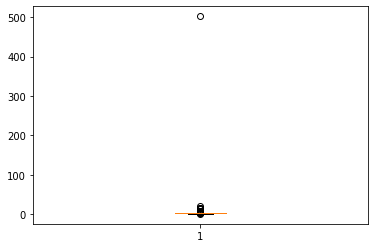

In [17]:
# Determine if there are any potential outliers in the average occupancy in California
occupancy = housing_df['AveOccup']
plt.boxplot(occupancy)

#yes there are potential outliers

In [32]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
quartiles = occupancy.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_df = housing_df.loc[(housing_df['AveOccup'] < lower_bound) | (housing_df['AveOccup'] > upper_bound)]['MedInc']
maximum_outlier = outlier_df.max()
minimum_outlier = outlier_df.min()

print(f'lowerq {lowerq}, upperq {upperq}, iqr {iqr}')
print(f'Outliers possibly occur when population is below {lower_bound} or above {upper_bound} occupants')
print(f'Of the outliers, the lowest median income is {minimum_outlier} while the highest is {maximum_outlier}')

lowerq 2.4250909806040477, upperq 3.2974592743428355, iqr 0.8723682937387878
Outliers possibly occur when population is below 1.116538539995866 or above 4.606011714951017 occupants
Of the outliers, the lowest median income is 0.716 while the highest is 15.0001


In [7]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.